In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Normal Distribution
Most of the simulations [in Cogsci 131 or otherwise] assume a normal distribution if there's a reasonable backing to substantiate that your data is unimodal, that is to say, they fall mostly within the 'mean' with a variation (standard deviation)

(array([2.500000e+02, 1.112200e+04, 1.990250e+05, 1.342898e+06,
        3.464572e+06, 3.450734e+06, 1.325719e+06, 1.947030e+05,
        1.074300e+04, 2.340000e+02]),
 array([-5.08843268e+00, -4.06992933e+00, -3.05142597e+00, -2.03292261e+00,
        -1.01441926e+00,  4.08409543e-03,  1.02258745e+00,  2.04109081e+00,
         3.05959416e+00,  4.07809752e+00,  5.09660087e+00]),
 <a list of 10 Patch objects>)

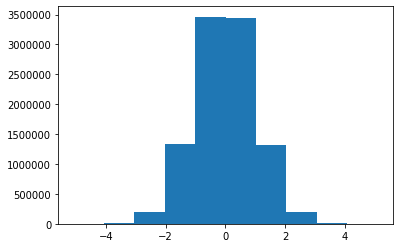

In [32]:
x=np.random.normal(0,1, 10000000)
plt.hist(x)

Sum 2 1
Sum 12 3
Sum 17 6


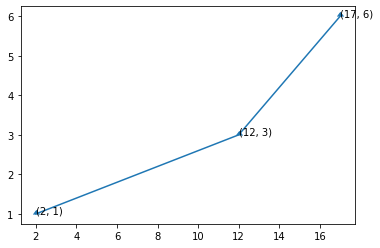

In [33]:
#Numpy has a nice function that returns the cumulative sum of the vectors
x=np.cumsum([2, 10, 5])
y=np.cumsum([1, 2, 3])

plt.plot(x, y, marker=10)
for i, j in zip(x, y):
    plt.annotate("({0}, {1})".format(i, j), xy=(i, j))
    print("Sum", i, j)
plt.show()

Problem 2: Plot 30 vectors that are coming from a standard normal distribution and show the trajectory they take

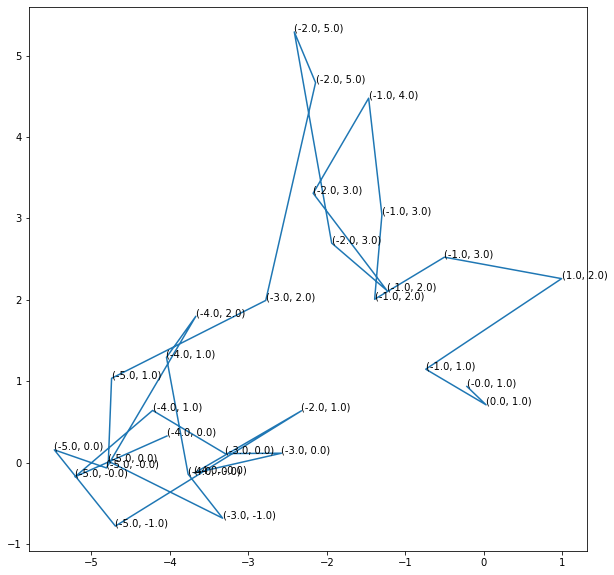

In [34]:
new_x=np.cumsum(np.random.normal(0,1,30))
new_y=np.cumsum(np.random.normal(0,1,30))
plt.figure(figsize=(10, 10))

for i, j in zip(new_x, new_y):
    rounded_i=round(i)  #I HAVE ROUNDED NUMBERS TO SHOW THE COORDINATES ON GRAPH. YOU SHOULDN'T BE ROUNDING FROM A DISTRIBUTION
    rounded_j=round(j)
    plt.annotate("({0}, {1})".format(rounded_i, rounded_j), xy=(i, j))

plt.plot(new_x, new_y)
plt.show()

Problem 3a: Suppose now the ant needs to its nest which is at (2, 3), and its current position is at (20, 11). Let the ant wander randomly with a normal distribution (0, 4). Plot the number of steps it took you to reach its nest

In [8]:
end_x=20
end_y=11
start=(2, 3)
next_x=0
next_y=0

count=0
while (next_x != start[0]) and (next_y != start[1]):
    round_x=round(np.random.normal(0,4)) #ROUNDED TO MAKE SURE IT RETURNS INTEGER. YOU SHOULDN'T BE ROUNDING IF YOU WANT TRUE DISTRIBUTION
    round_y=round(np.random.normal(0,4))
    next_x+=round_x
    next_y+=round_y
    count+=1

print("The number of steps it took:", count)

The number of steps it took: 2


### Simulations

You run simulations to estimate the probabilites of the likelihood of an event

Problem 3b. Following up the previous question. 
Find the probability that the ant will reach home within 50 steps

In [21]:
def simulate():
    step_count=0
    end_x=20
    end_y=11
    start=(2, 3)
    next_x=0
    next_y=0
    
    while (next_x != start[0]) and (next_y != start[1]):
        round_x=round(np.random.normal(0,4)) #ROUNDED TO MAKE SURE IT RETURNS INTEGER. YOU SHOULDN'T BE ROUNDING IF YOU WANT TRUE DISTRIBUTION
        round_y=round(np.random.normal(0,4))
        next_x+=round_x
        next_y+=round_y
        step_count+=1
    return step_count

total_trials=1000
threshold=20
success=0

for i in range(total_trials):
    steps = simulate()
    if steps <= threshold:
        success += 1
prob=success/total_trials
print(prob)

0.715


Problem 4: Suppose it takes you 150 energy packets to calculate the exact solution to an assignment problem. However you can choose to get an approximate solution. This approximate solution costs 1/(S+1), where S is the standard deviation. You will receieve a partial credit which is a function of how close your answer is to the standard solution where credit = 250*(1/S^2+1) energy packets

Plot the trade off for SD 0, 10, 50, 100


Standard Deviation			 [  0  10  50 100]
Energy Spent on Solution		 [-150.          -13.63636364   -2.94117647   -1.48514851]
Energy Gained from Credits		 [2.50000000e+02 2.47524752e+00 9.99600160e-02 2.49975002e-02]
Total Energy				 [100.         -11.16111611  -2.84121645  -1.46015101]


Text(0, 0.5, 'Energy')

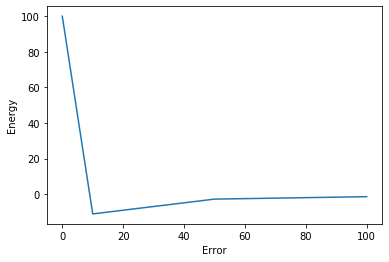

In [37]:

s_d=np.array([0, 10, 50, 100])
print("\nStandard Deviation\t\t\t", s_d)
packets_spent=-150*(1/(s_d+1))
print("Energy Spent on Solution\t\t", packets_spent)
gained_packets_creds= (1/((s_d)**2+1))*250
print("Energy Gained from Credits\t\t", gained_packets_creds)
total_packets=gained_packets_creds+packets_spent
print("Total Energy\t\t\t\t", total_packets)

#plot tradeoff
plt.plot(s_d, total_packets)
plt.xlabel("Error")
plt.ylabel("Energy")

### Log Scale
When we are comparing numbers of very large magnitude, it's easier to represent (and make sense of them) by changing the scale of representation to log form. 

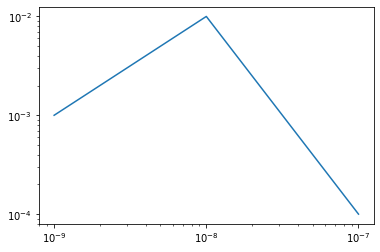

In [38]:
x=[10e-10,10e-9, 10e-8]
y=[10e-4,10e-3, 10e-5]
plt.xscale("log")
plt.yscale("log")
plt.plot(x, y)